In [ ]:
#Pheonix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
#from pylab import *
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
index=9

x_train[index]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


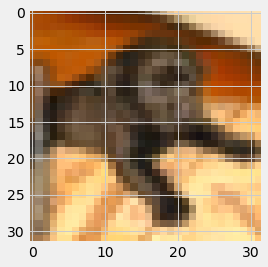

In [ ]:
img=plt.imshow(x_train[index])

In [ ]:
print('The image label is:',y_train[index])

The image label is: [5]


In [ ]:
classification =['airoplane','automobile','car','bird','cat','deer','dog','frog','horse','ship','truck']
print('The image class is:',classification[y_train[index][0]])

The image class is: deer


In [ ]:
y_train_one_hot= to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print('The one hot label is:',y_train_one_hot[index])

The one hot label is: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
x_train=x_train/225
x_test=x_test/225

In [ ]:
x_train[index]

In [ ]:
model = Sequential()

model.add( Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)) )

model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(32,(5,5),activation='relu') )

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train_one_hot,
                 batch_size=256,
                 epochs=10,
                 validation_split=0.2
                 )

Epoch 1/10
157/157 [==============================] - 59s 377ms/step - loss: 0.7894 - accuracy: 0.7222 - val_loss: 0.9291 - val_accuracy: 0.6819
Epoch 2/10
157/157 [==============================] - 58s 372ms/step - loss: 0.7588 - accuracy: 0.7317 - val_loss: 0.9924 - val_accuracy: 0.6632
Epoch 3/10
157/157 [==============================] - 58s 370ms/step - loss: 0.7227 - accuracy: 0.7430 - val_loss: 0.9361 - val_accuracy: 0.6826
Epoch 4/10
157/157 [==============================] - 58s 371ms/step - loss: 0.6981 - accuracy: 0.7537 - val_loss: 0.9439 - val_accuracy: 0.6792
Epoch 5/10
157/157 [==============================] - 59s 373ms/step - loss: 0.6574 - accuracy: 0.7673 - val_loss: 0.9556 - val_accuracy: 0.6810
Epoch 6/10
157/157 [==============================] - 59s 379ms/step - loss: 0.6259 - accuracy: 0.7765 - val_loss: 0.9607 - val_accuracy: 0.6816
Epoch 7/10
157/157 [==============================] - 59s 376ms/step - loss: 0.6017 - accuracy: 0.7852 - val_loss: 0.9162 - val_ac

In [ ]:
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 6s 18ms/step - loss: 0.9780 - accuracy: 0.6893


0.689300000667572

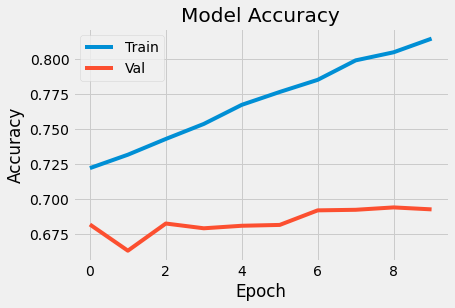

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

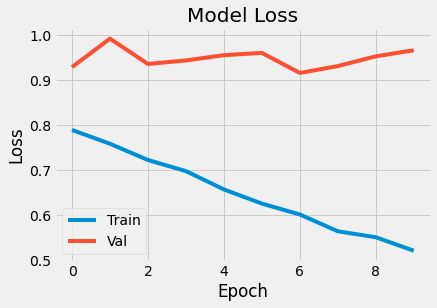

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower left')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WhatsApp Image 2022-01-19 at 6.23.00 PM.jpeg to WhatsApp Image 2022-01-19 at 6.23.00 PM (3).jpeg


##Try here


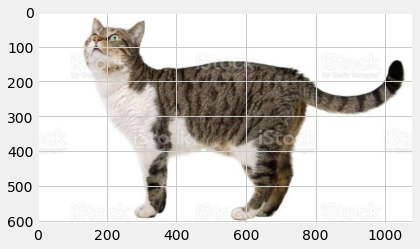

In [ ]:
new_image =plt.imread('WhatsApp Image 2022-01-19 at 6.23.00 PM.jpeg')
img=plt.imshow(new_image)

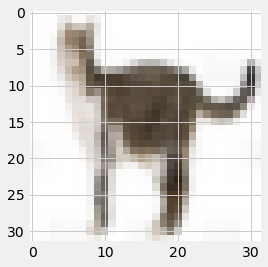

In [ ]:
from skimage.transform import resize
resize_image=resize(new_image,(32,32,3))
img=plt.imshow(resize_image)

In [ ]:
predictions = model.predict(np.array([resize_image]))
predictions

array([[6.1081229e-03, 9.5427222e-06, 8.1747338e-02, 3.5449922e-02,
        6.6762465e-01, 1.4354727e-01, 2.8113701e-04, 6.5108173e-02,
        2.3105275e-05, 1.0069723e-04]], dtype=float32)

In [ ]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
    
print(list_index)

[4, 5, 2, 7, 3, 0, 6, 9, 8, 1]


In [ ]:
for i in range(5):
  print(classification[list_index[i]],':', round(predictions[0][list_index[i]]*100,2),'%')


cat : 66.76 %
deer : 14.35 %
car : 8.17 %
frog : 6.51 %
bird : 3.54 %
